In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Sales/Sales_January_2019.csv')
df1['month']='Jan'
df2 = pd.read_csv('Sales/Sales_February_2019.csv')
df2['month']='Feb'
df3 = pd.read_csv('Sales/Sales_March_2019.csv')
df3['month']='Mar'
df4 = pd.read_csv('Sales/Sales_April_2019.csv')
df4['month']='Apr'
df5 = pd.read_csv('Sales/Sales_May_2019.csv')
df5['month']='May'
df6 = pd.read_csv('Sales/Sales_June_2019.csv')
df6['month']='Jun'
df7 = pd.read_csv('Sales/Sales_July_2019.csv')
df7['month']='Jul'
df8 = pd.read_csv('Sales/Sales_August_2019.csv')
df8['month']='Aug'
df9 = pd.read_csv('Sales/Sales_September_2019.csv')
df9['month']='Sep'
df10 = pd.read_csv('Sales/Sales_October_2019.csv')
df10['month']='Oct'
df11 = pd.read_csv('Sales/Sales_November_2019.csv')
df11['month']='Nov'
df12 = pd.read_csv('Sales/Sales_December_2019.csv')
df12['month']='Dec'
#adding new columns to each df

In [3]:
list=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [4]:
for i in list: 
    print(i.shape)
# Check the shape of each dataframe to understand their size and structure for further merging.

(9723, 7)
(12036, 7)
(15226, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [5]:
frame = pd.concat(list, ignore_index=True)
frame 
# Merge all dataframes into one large frame, ignoring the original indices, to consolidate all sales data.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec


In [6]:
frame.info()
# Display basic info about the combined dataframe to review column types and identify data issues.
#for insance the column quantity should be integer not object, also price each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [8]:
frame.isnull().sum()
# Sum null values in each column to assess how much missing data needs to be handled.

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64

In [10]:
frame.duplicated().sum()
#checking how manu duplicate data i have 

np.int64(1140)

In [14]:
frame.nunique()
#how many unique data in each row.

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
month                   12
dtype: int64

In [15]:
frame['Product'].unique()
# Show unique product names to identify categories and spot anomalies (like NaN or misnamed products).

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [18]:
frame.columns = [col.lower() for col in frame]
frame.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'month'],
      dtype='object')

In [22]:
frame.rename(columns={
    'order id': 'order_id',
    'quantity ordered': 'quantity_ordered',
    'price each': 'price_each',
    'order date': 'order_date',
    'purchase address': 'purchase_address'}, inplace=True)
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec


In [26]:
(frame.isnull().sum().sum() / len(frame)) * 100
#checking th percentage of missing data from the whole dataframe 

np.float64(1.75006689858175)

In [28]:
frame = frame.dropna()
frame.isnull().sum()
#df.dropna()  # Remove ALL rows with any NaN

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
dtype: int64

In [30]:
frame['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [31]:
frame['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [33]:
df = frame[frame['quantity_ordered'] != 'Quantity Ordered']
#Remove rows with incorrect string entries in 'quantity_ordered' and 'price_each' columns

In [34]:
df = frame[frame['price_each'] != 'Price Each']

In [35]:
df['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [38]:
df = df.astype({'quantity_ordered': int, 'price_each': float})
df.info()
#converting the columns types to the right one

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int64  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.3+ MB


In [ ]:
#1- what is the best month for sales and how much it generated?
#2- what is the city that have the highest sales?
#3- which is the most sold product?
#4- when should we promote products to increase the probabilty of sales, what time and what quantity we have the most sales?


In [ ]:
#1- what is the best month for sales and how much it generated?

In [40]:
df['sales'] = df['quantity_ordered'] * df['price_each']
df
# Calculate total price for each order (sales column)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99


In [49]:
month_sales = df.groupby('month')['sales'].agg(sales_sum = 'sum').sort_values(by='sales_sum', ascending=False).reset_index()
month_sales
# Summarize total monthly sales, sorted descending

,month,sales_sum
0,Dec,4619297.12
1,Oct,3736884.05
2,Apr,3396059.11
3,Nov,3198909.23
4,May,3144584.80
5,Mar,2809063.30
6,Jul,2646899.69
7,Jun,2578293.30
8,Aug,2244412.31
9,Feb,2203481.24


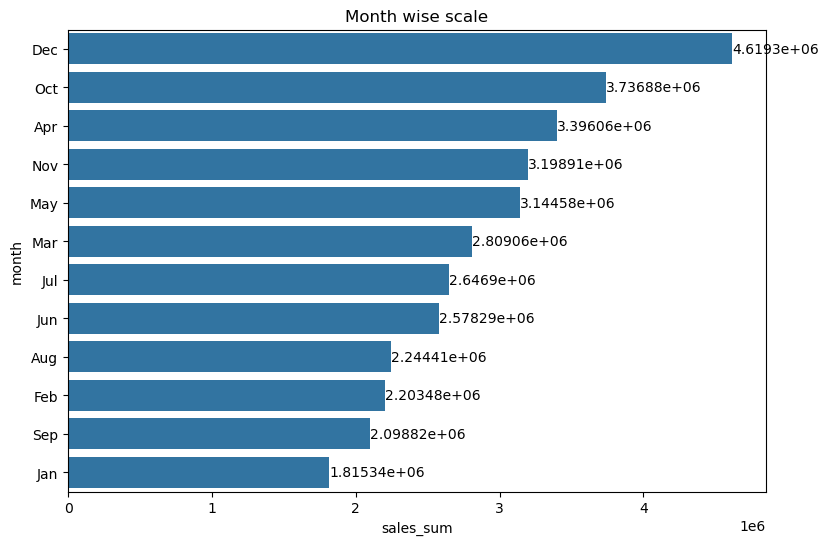

In [65]:
fig, ax = plt.subplots(figsize = (9, 6))
#Sets up a blank chart (figure) and an area inside it (axes) with size 9x6 inches.
#fig is the whole picture, ax is the part where the data will show.

ax = sns.barplot(x = 'sales_sum', y = 'month', data = month_sales)

plt.title('Month wise scale')
ax.bar_label(ax.containers[0])
#Labels each bar with the exact value, so you can see each month's sales number.
plt.show()

In [ ]:
#2- what is the city that have the highest sales?

In [66]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99


In [89]:
def get_city(address):
    return address.split(",")[1].strip(" ")
# From a full address string, split by ',' to separate parts and take the second part (the city name). Remove extra spaces.

def get_state(address):
    return address.split(",")[2].split(" ")[1]
 # From a full address string, split by ',' and take the third part (contains state and ZIP). Then split again by space and take the state code.

df['city'] = df['purchase_address'].apply(lambda x: get_city(x) + ' ' + '('  + get_state(x) + ')')
# For every address, make a new city column showing 'City(State)' like 'Boston(MA)' using the helper functions above.

df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX)


In [91]:
city_sales = df.groupby('city')['sales'].agg(city_sales = 'sum').sort_values(by='city_sales', ascending=False).reset_index()
city_sales

,city,city_sales
0,San Francisco (CA),8262203.91
1,Los Angeles (CA),5452570.80
2,New York City (NY),4664317.43
3,Boston (MA),3661642.01
4,Atlanta (GA),2795498.58
5,Dallas (TX),2767975.40
6,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
8,Austin (TX),1819581.75
9,Portland (ME),449758.27


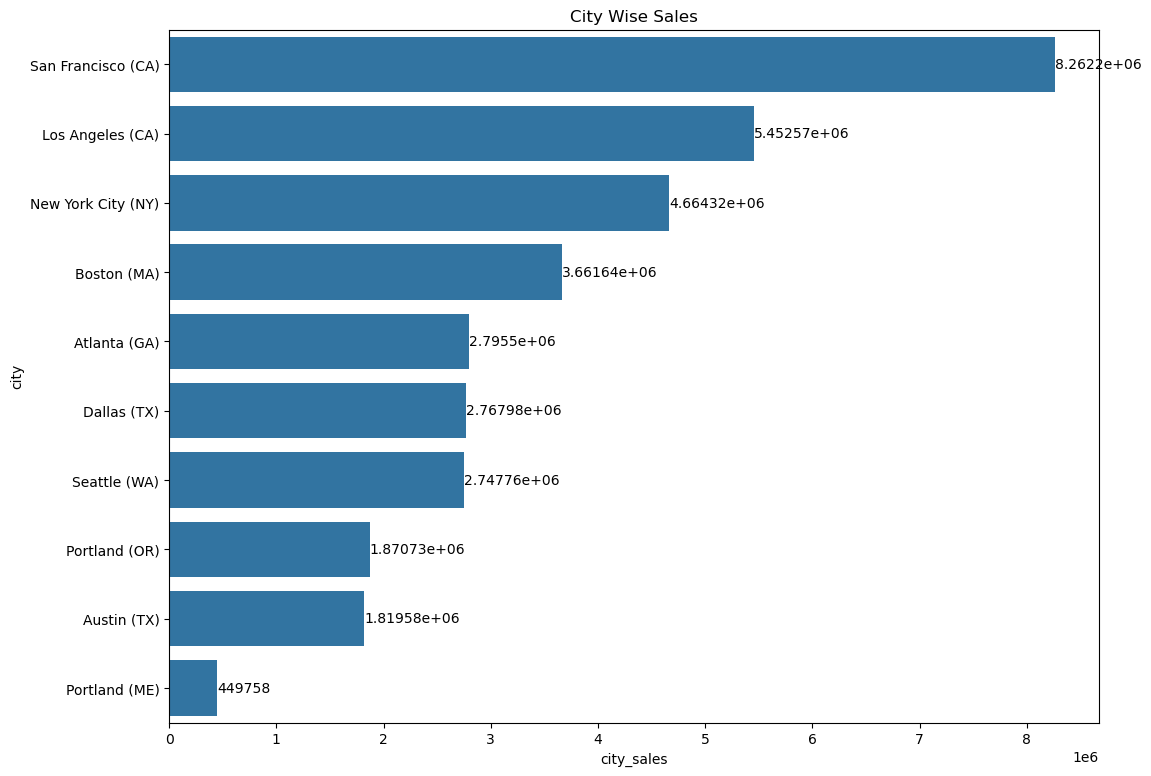

In [100]:
fig, ax = plt.subplots(figsize=(12,9))

ax = sns.barplot(x='city_sales', y='city', data=city_sales)

ax.bar_label(ax.containers[0])

plt.title('City Wise Sales')
plt.show()

In [ ]:
#3- which is the most sold product?

In [101]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99,Dallas (TX)


In [102]:
df.nunique()

order_id            178437
product                 19
quantity_ordered         9
price_each              17
order_date          142395
purchase_address    140787
month                   12
sales                   54
city                    10
dtype: int64

In [109]:
product_sales = df.groupby('product')['quantity_ordered'].agg(most_sold='sum').sort_values('most_sold', ascending=False).reset_index()
product_sales

,product,most_sold
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


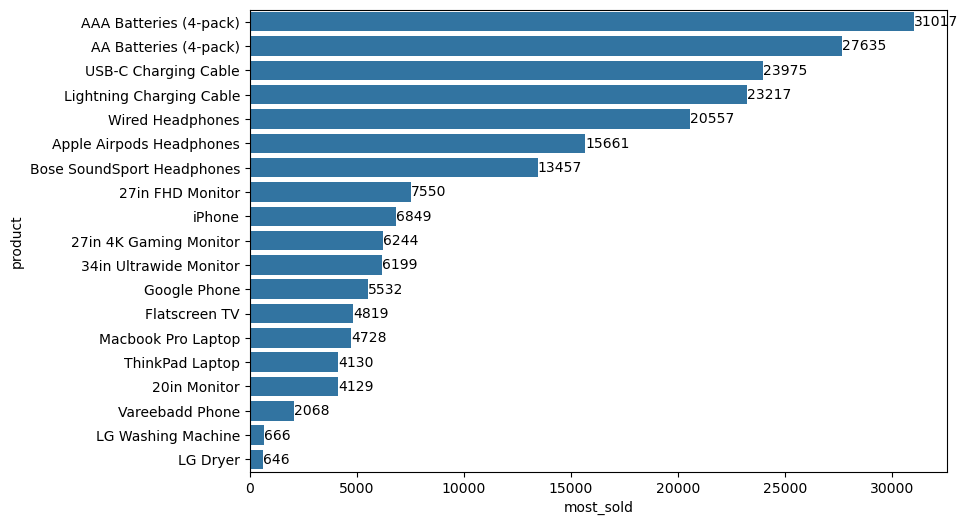

In [111]:
fig, ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x= 'most_sold', y ='product', data= product_sales)
ax.bar_label(ax.containers[0])
plt.show()

In [112]:
df
#i will answer a question of which product generated money for me?

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99,Dallas (TX)


In [113]:
shark = df.groupby('product')['sales'].agg(income='sum').sort_values('income', ascending=False).reset_index()
shark

,product,income
0,Macbook Pro Laptop,8037600.00
1,iPhone,4794300.00
2,ThinkPad Laptop,4129958.70
3,Google Phone,3319200.00
4,27in 4K Gaming Monitor,2435097.56
5,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
7,Flatscreen TV,1445700.00
8,Bose SoundSport Headphones,1345565.43
9,27in FHD Monitor,1132424.50


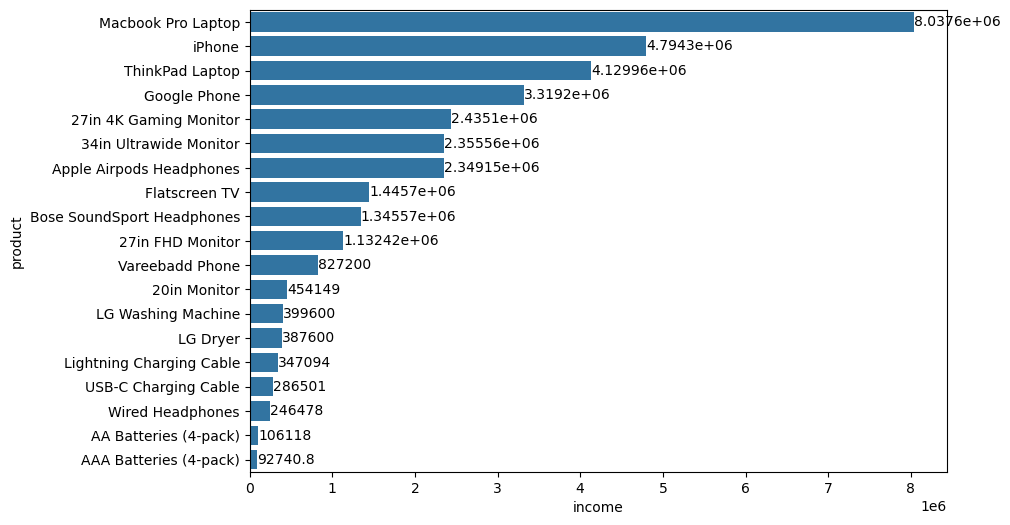

In [116]:
fig, ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(x= 'income', y = 'product', data = shark)
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
#when should we promote products to increase the probabilty of sales, what time and what quantity we have the most sales?

In [117]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99,Dallas (TX)


In [120]:
def get_clock(time):
    return time.split(' ')[1].split(':')[0]
    
df['exact_time'] = df['order_date'].apply(lambda x: get_clock(x))
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,exact_time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,14.95,San Francisco (CA),20
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,Los Angeles (CA),12
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,400.00,Seattle (WA),06
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,11.99,Dallas (TX),10


In [137]:
promo_time = df.groupby('exact_time').agg(most_grss=('sales', 'sum'), total_qntt=('quantity_ordered', 'sum')).sort_values('most_grss', ascending=False).reset_index()

promo_time

,exact_time,most_grss,total_qntt
0,19,2412938.54,14470
1,12,2316821.34,14202
2,11,2300610.24,14005
3,20,2281716.24,13768
4,18,2219348.30,13802
5,13,2155389.80,13685
6,17,2129361.61,12229
7,14,2083672.73,12362
8,21,2042000.86,12244
9,10,1944286.77,12308


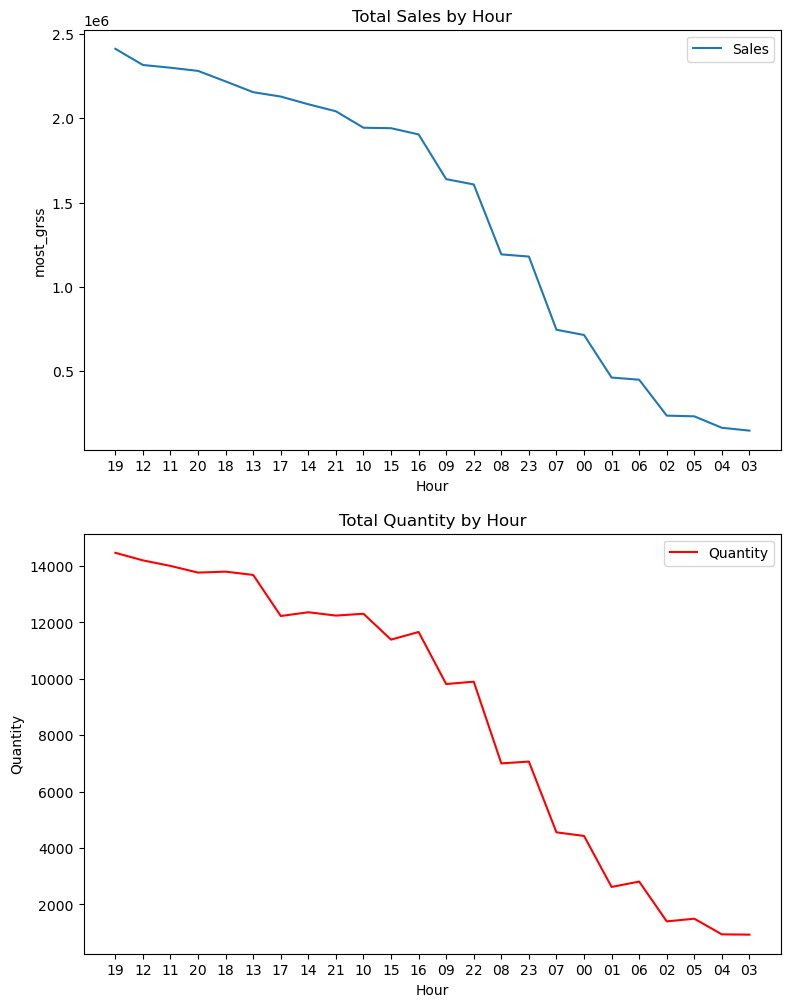

In [158]:
fig, axes = plt.subplots(2, 1, figsize=(9,12))

sns.lineplot(x= 'exact_time', y= 'most_grss', data= promo_time, ax=axes[0], label='Sales')
axes[0].set_title('Total Sales by Hour')
axes[0].set_xlabel('Hour')
axes[1].set_ylabel('Sales')

sns.lineplot(x='exact_time', y='total_qntt', data=promo_time, ax=axes[1], label='Quantity', color='red')
axes[1].set_title('Total Quantity by Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Quantity')

plt.show()